<a href="https://www.kaggle.com/code/vincentvandeghinste/mtat26-t5?scriptVersionId=299780690" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Download and install necessary modules

In [1]:
!wget https://raw.githubusercontent.com/VincentCCL/MTAT/refs/heads/main/code/finetune_pretrained_t5.py
!pip install sacrebleu
!wget https://raw.githubusercontent.com/VincentCCL/MTAT/refs/heads/main/code/t5_translate.py
!wget https://raw.githubusercontent.com/VincentCCL/MTAT/refs/heads/main/code/plot_train_val_new.py
!pip -q install evaluate sacrebleu

--2026-02-24 14:58:04--  https://raw.githubusercontent.com/VincentCCL/MTAT/refs/heads/main/code/finetune_pretrained_t5.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14234 (14K) [text/plain]
Saving to: ‘finetune_pretrained_t5.py’

finetune_pretrained 100%[===================>]  13.90K  --.-KB/s    in 0s      

2026-02-24 14:58:04 (27.2 MB/s) - ‘finetune_pretrained_t5.py’ saved [14234/14234]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.8/100.8 kB 2.5 MB/s eta 0:00:00
--2026-02-24 14:58:11--  https://raw.githubusercontent.com/VincentCCL/MTAT/refs/heads/main/code/t5_translate.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuser

# Actual training

In [2]:
!python finetune_pretrained_t5.py \
  --src-file /kaggle/input/datasets/vincentvandeghinste/tatoeba-en-nl/train.en \
  --tgt-file /kaggle/input/datasets/vincentvandeghinste/tatoeba-en-nl/train.nl \
  --src-val /kaggle/input/datasets/vincentvandeghinste/tatoeba-en-nl/dev.en \
  --tgt-val /kaggle/input/datasets/vincentvandeghinste/tatoeba-en-nl/dev.nl \
  --epochs 10 --batch-size 16 --lr 5e-5 \
  --save t5_en_nl \
  --eval-metrics \
  --history-json t5.hist \
  --show-val-examples 5 \
  --max-src-len 128 --max-tgt-len 128 \
  --num-beams 4 --max-gen-len 128


E0000 00:00:1771945121.676596      60 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771945121.785549      60 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771945122.735915      60 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771945122.735969      60 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771945122.735974      60 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771945122.735978      60 computation_placer.cc:177] computation placer already registered. Please check linka

# Translation of a file (and evaluation)

In [3]:
!python pretrained_translate.py \
  --model-dir t5_en_nl \
  --src-file /kaggle/input/datasets/vincentvandeghinste/tatoeba-en-nl/test.en \
  --out-file test.t5.nl \
  --ref-file /kaggle/input/datasets/vincentvandeghinste/tatoeba-en-nl/test.nl \
  --metrics bleu,chrf \
  --batch-size 32 \
  --max-src-len 128 \
  --max-gen-len 128 \
  --num-beams 4


python3: can't open file '/kaggle/working/pretrained_translate.py': [Errno 2] No such file or directory


In [4]:
!head -n 20 test.t5.nl

head: cannot open 'test.t5.nl' for reading: No such file or directory


# ADD HISTORY CHARTS !

In [5]:
from IPython.display import Image, display

Saved plot to t5_train_val.png


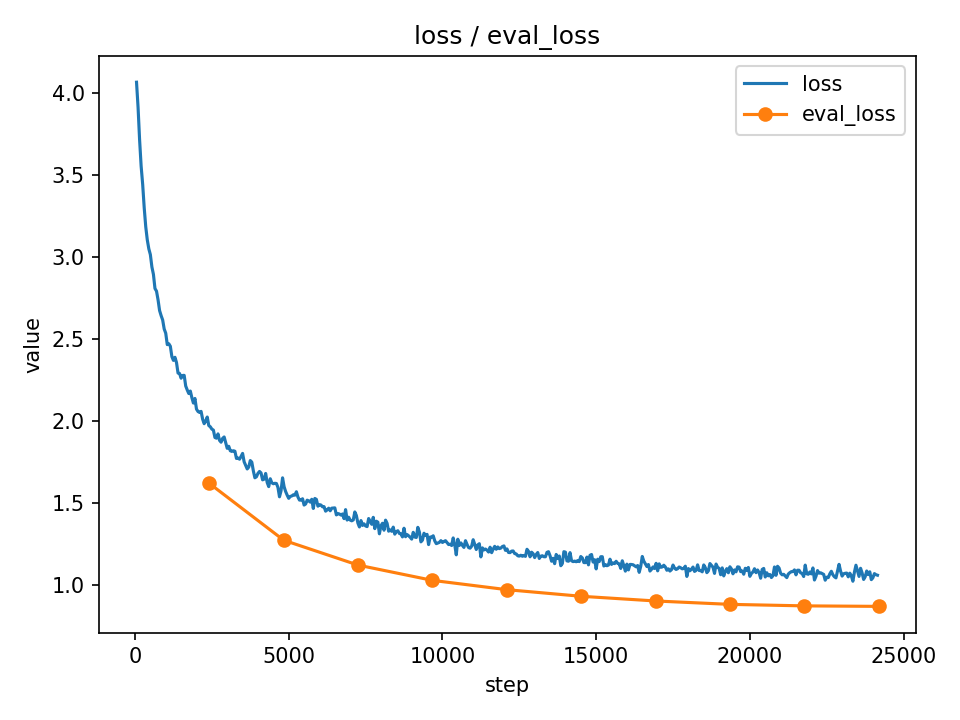

In [6]:
!python plot_train_val_new.py t5.hist --train-key loss --val-key eval_loss --save t5_train_val.png

display(Image(filename="t5_train_val.png"))

Saved plot to t5_bleu.png


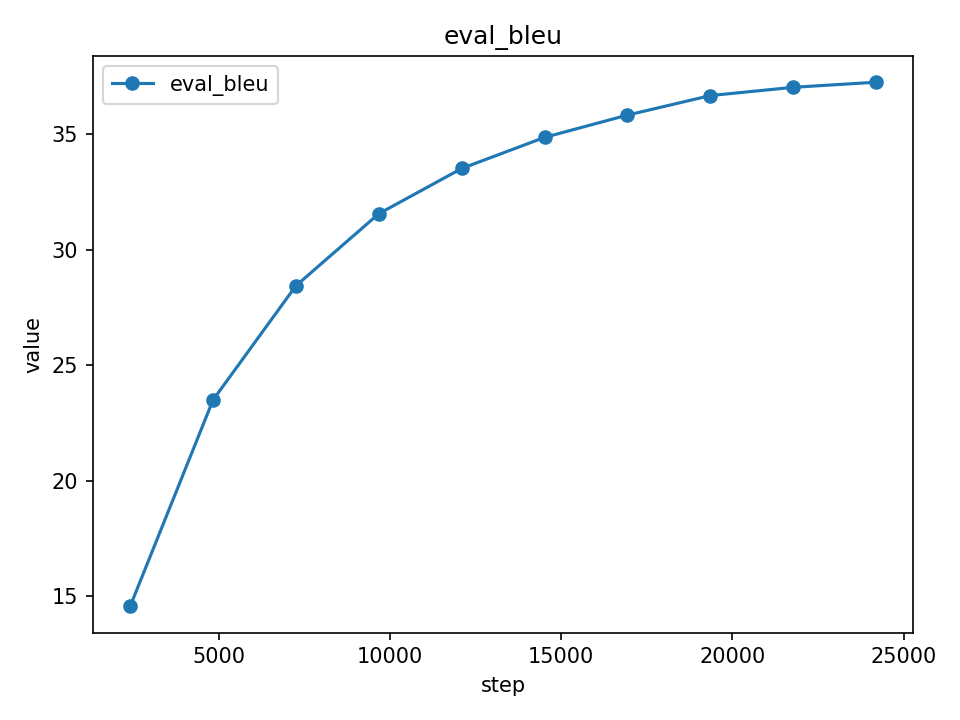

In [7]:
!python plot_train_val_new.py t5.hist \
  --val-key eval_bleu \
  --save t5_bleu.png

display(Image(filename="t5_bleu.png"))

